<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Assessment_Tools/%D0%9C%D0%BE%D0%BD%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%BD%D0%B3_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA_%D0%BD%D0%B0_%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рассмотрим пример мониторинга точности и кросс-энтропийной потери на валидационном наборе во время обучения нейронной сети для задачи классификации:

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Генерация тестовых данных
X, y = make_blobs(n_samples=1000, centers=2, n_features=10, random_state=1)

# Разделение на тренировочный и валидационный наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ранняя остановка при ухудшении валидационной кросс-энтропии
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели с мониторингом валидационных метрик
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 2.3752 - accuracy: 0.5163 - val_loss: 1.4639 - val_accuracy: 0.4350
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6687 - val_loss: 0.2203 - val_accuracy: 0.9900
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9987 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 8/100


Пример с использованием котировок BTC из yfinance, демонстрирующий визуализацию обучения нейронной сети с нормальным обучением и с переобучением.

[*********************100%%**********************]  1 of 1 completed


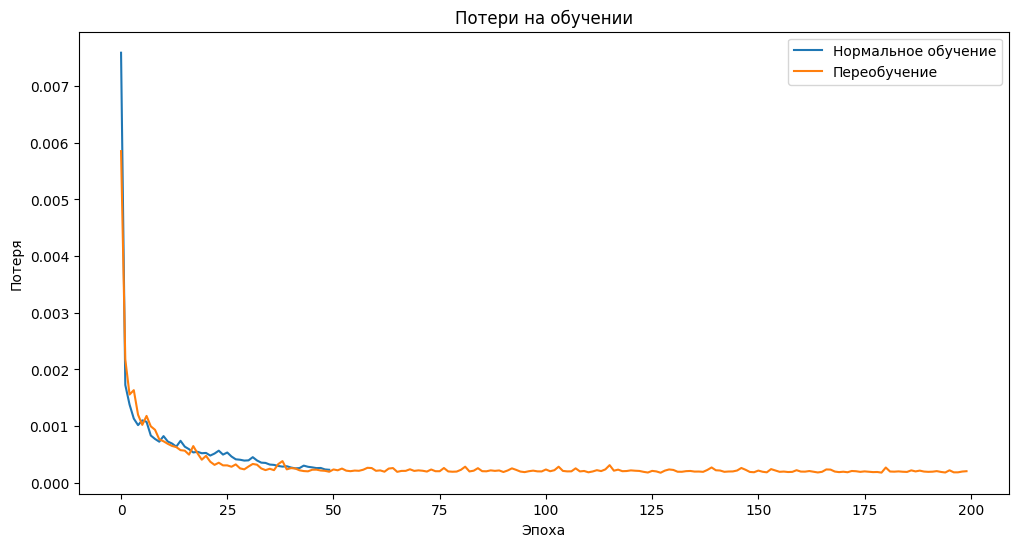

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Загрузка данных котировок BTC
ticker = "BTC-USD"
data = yf.download(ticker, start="2017-01-01", end="2021-01-01")
data = data["Adj Close"].to_frame()

# Нормализация данных
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Разделение данных на тренировочный и тестовый наборы
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Подготовка данных для обучения нейронной сети
window_size = 30
X_train = []
y_train = []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Создание и обучение моделей
# Модель без переобучения
model_normal = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model_normal.compile(loss='mean_squared_error', optimizer='adam')
history_normal = model_normal.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Модель с переобучением
model_overfit = Sequential([
    LSTM(100, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(100, return_sequences=True),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(1)
])
model_overfit.compile(loss='mean_squared_error', optimizer='adam')
history_overfit = model_overfit.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# Визуализация потерь на обучении
plt.figure(figsize=(12, 6))
plt.plot(history_normal.history['loss'], label='Нормальное обучение')
plt.plot(history_overfit.history['loss'], label='Переобучение')
plt.title('Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()
plt.show()